In [5]:
# Senior Design Spring 2019
# 3D plot at least 1 point from each user in the database

from pymongo import MongoClient
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from matplotlib import animation
from mpl_toolkits import mplot3d
import numpy as np
import pandas as pd
import pickle
from random import sample
from sklearn.decomposition import PCA

%matplotlib notebook

<IPython.core.display.Javascript object>


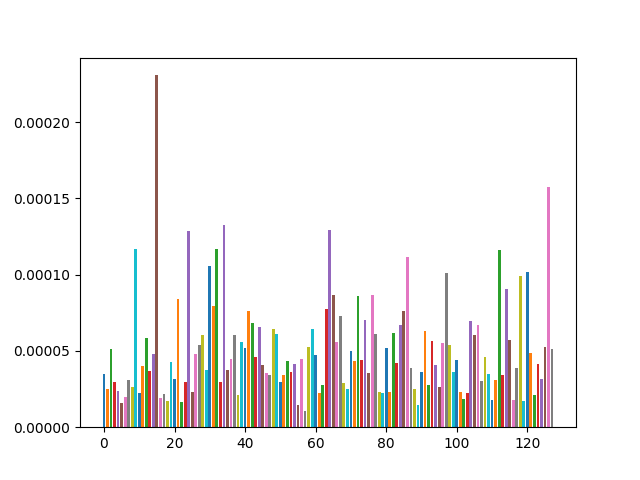

<class 'pandas.core.series.Series'>


<IPython.core.display.Javascript object>


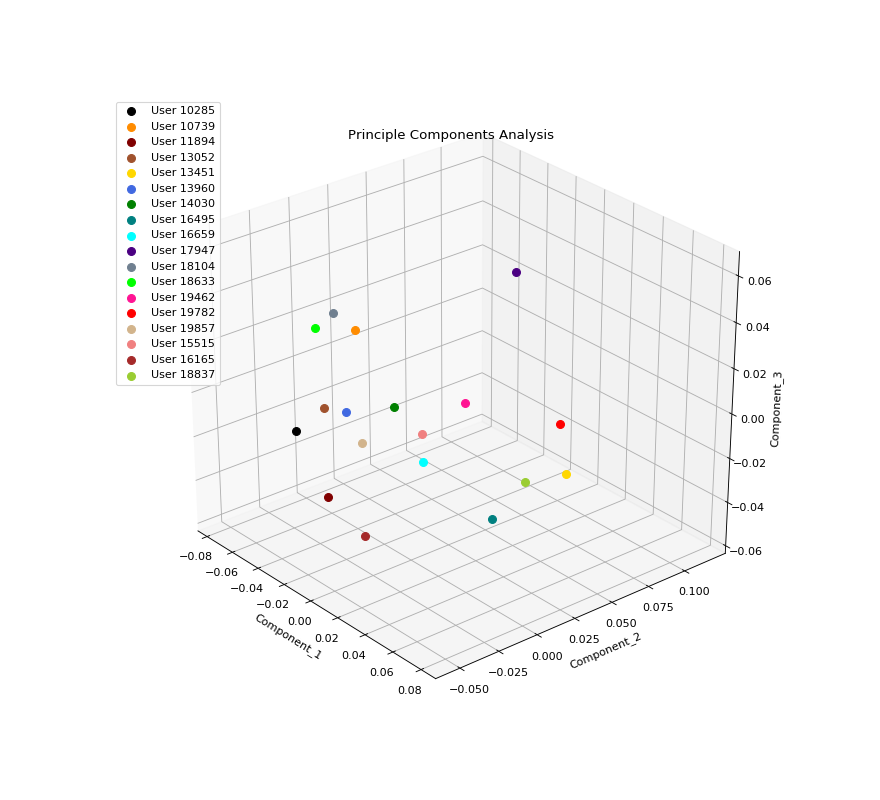

In [24]:
def connect(host, port):
    """
    :param host: String, DB host port i.e. 'mongodb://localhost'
    :param port: Ing, Server port 'localhost default-27017
    :return: connection
    """
    return MongoClient(host, port)


client = connect('mongodb://localhost', 27017)
db = client.SeniorDesign
users = db.users


Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='SD'), bitrate=1800)

emb = []
id = []
for u in users.find():
    k = pickle.loads(u['recognize'])
    emb.append(k[0])
    id.append(u['user_id'])
    # for i in k:
    #     emb.append(i)
    #     id.append(u['user_id'])


pca = PCA(n_components=3)

df = pd.DataFrame(emb)
variance = df.var()
for i in range(len(variance)):
    plt.bar(i, variance[i])
plt.show()
print(type(variance))
# plt.bar(variance)
# plt.show()

df = pca.fit_transform(df)


fig = plt.figure(figsize=(11,10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
#all_colors = [k for k,v in pltc.cnames.items()]
#colors = sample(all_colors, 100)
colors = ['black', 'darkorange', 'maroon', 'sienna', 'gold',
         'royalblue', 'green', 'teal', 'cyan', 'indigo',
         'slategray', 'lime', 'deeppink', 'red', 'tan',
         'lightcoral', 'brown', 'yellowgreen']
for i in range(df.shape[0]):
    ax.scatter(df[i][0], df[i][1], df[i][2], c=colors[i], s = 50, label='User '+ str(id[i]))

def rotate(angle):
    ax.view_init(azim=angle)

ax.set_title('Principle Components Analysis')
ax.legend(loc='upper left')
ax.set_ylabel('Component_2')
ax.set_xlabel('Component_1')
ax.set_zlabel('Component_3')

animation_figure = animation.FuncAnimation(fig, rotate, frames=np.arange(0,360,2), interval=100)
# animation_figure.save('anim.mp4', writer=writer)